# Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import random

from sklearn.model_selection import train_test_split #Split the dataset into train and test
from sklearn.linear_model import Ridge, Lasso, LinearRegression#Linear model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score #metrics for examining the model
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz, plot_tree

#подготовка данных
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve, auc,
                             classification_report)

#настройка гиперпараметров
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Описание данных

In [2]:
#Attrition_Flag	          Aктивность клиента — если учетная запись закрыта, то Attrited Customer, иначе Existing Customer
#Customer_Age	          Bозраст клиента в годах
#Gender	                  М=мужчина, Ж=женщина
#Dependent_count	      Количество иждивенцев
#Education_Level       	  Образование, квалификация владельца счета (пример: средняя школа, выпускник колледжа и т. д.)
#Marital_Status	          Женат, Холост, Разведен, Неизвестно
#Income_Category	      Категория годового дохода владельца счета  
#Card_Category	          Тип карты (Синяя, Серебряная, Золотая, Платиновая)
#Months_on_book	          Период отношений с банком
#Total_Relationship_Count Общее количество продукции, хранящейся у клиента
#Months_Inactive_12_mon	  Количество месяцев бездействия за последние 12 месяцев
#Contacts_Count_12_mon	  Количество контактов за последние 12 месяцев
#Credit_Limit	          Кредитный лимит по кредитной карте
#Total_Revolving_Bal	  Общий оборотный баланс на кредитной карте
#Avg_Open_To_Buy	      Открытая кредитная линия для покупки (среднее значение за последние 12 месяцев)
#Total_Amt_Chng_Q4_Q1	  Изменение суммы транзакции (Q4 по сравнению с Q1)
#Total_Trans_Amt	      Общая сумма транзакции (последние 12 месяцев)
#Total_Trans_Ct	          Общее количество транзакций (последние 12 месяцев)
#Total_Ct_Chng_Q4_Q1      Изменение количества транзакций (Q4 по сравнению с Q1)
#Avg_Utilization_Ratio	  Средний коэффициент использования карт

# Предобработка данных

In [3]:
df = pd.read_csv('train6.csv')
df

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,715630983,31,F,0,Graduate,Single,Less than $40K,Blue,21,4,...,3,4598.0,0,4598.0,0.439,6317,77,0.833,0.000,Attrited Customer
1,713643858,53,F,1,College,Married,$40K - $60K,Blue,43,4,...,2,1525.0,1411,114.0,0.660,1911,47,0.958,0.925,Existing Customer
2,708334158,46,F,3,Graduate,Divorced,Less than $40K,Blue,34,4,...,4,9863.0,686,9177.0,0.581,3068,58,0.933,0.070,Existing Customer
3,711033408,50,F,2,High School,Married,Less than $40K,Blue,36,5,...,2,9355.0,1626,7729.0,0.701,1230,28,0.867,0.174,Existing Customer
4,711368283,39,M,2,Unknown,Married,$80K - $120K,Blue,27,3,...,2,34516.0,1629,32887.0,1.078,3448,53,1.038,0.047,Existing Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7590,772596783,31,M,1,Graduate,Unknown,Less than $40K,Gold,21,3,...,2,15261.0,1109,14152.0,0.655,15442,125,0.761,0.073,Existing Customer
7591,820330008,46,M,5,High School,Married,$120K +,Blue,42,1,...,3,32926.0,1540,31386.0,0.862,8231,98,0.556,0.047,Existing Customer
7592,720614658,40,M,2,High School,Divorced,$60K - $80K,Blue,25,6,...,2,2978.0,0,2978.0,0.490,3879,95,0.583,0.000,Existing Customer
7593,709759908,46,M,2,Graduate,Married,$60K - $80K,Blue,36,4,...,2,1939.0,685,1254.0,0.421,4327,84,0.680,0.353,Existing Customer


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7595 entries, 0 to 7594
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 7595 non-null   int64  
 1   Customer_Age              7595 non-null   int64  
 2   Gender                    7595 non-null   object 
 3   Dependent_count           7595 non-null   int64  
 4   Education_Level           7595 non-null   object 
 5   Marital_Status            7595 non-null   object 
 6   Income_Category           7595 non-null   object 
 7   Card_Category             7595 non-null   object 
 8   Months_on_book            7595 non-null   int64  
 9   Total_Relationship_Count  7595 non-null   int64  
 10  Months_Inactive_12_mon    7595 non-null   int64  
 11  Contacts_Count_12_mon     7595 non-null   int64  
 12  Credit_Limit              7595 non-null   float64
 13  Total_Revolving_Bal       7595 non-null   int64  
 14  Avg_Open

<div class="alert alert-info"> <b> Признаков довольно много. Пропусков нет. </b></div>

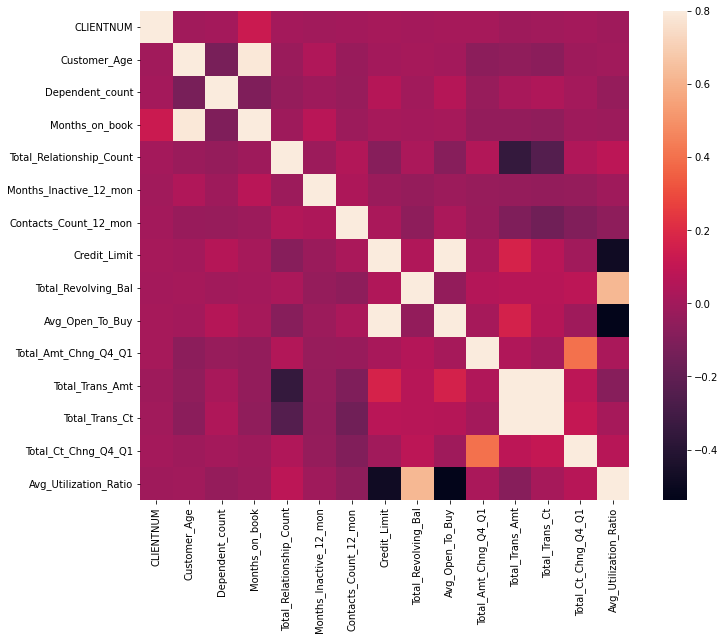

In [5]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

## Целевой признак - активность клиента (будет пользоваться кредитной картой или нет).  

## Анализ и предобработка данных:

<AxesSubplot:title={'center':'Count (Attrition_Flag)'}>

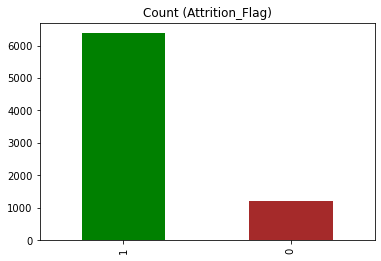

In [6]:
# Переведем наш целевой признак в бинарный вид и отобразим его:
df['Attrition_Flag'] = df['Attrition_Flag'].apply(lambda x: 0 if x == "Attrited Customer" else 1)
df.Attrition_Flag.value_counts().plot(
    kind='bar', 
    title='Count (Attrition_Flag)', 
    color = ['green', 'brown']
)


# Неиспользующих кредитную карту значительно больше

<div class="alert alert-info"> <b>Удалим признак Avg_Utilization_Ratio, который создает мультиколлинеарность сразу с двумя признаками</b></div>

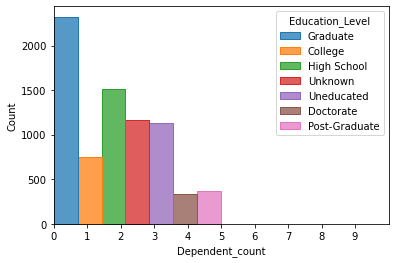

In [7]:
# Произведем замену для ряда категориальных признаков:
fig, ax = plt.subplots()
ax.set_xlim(0,10)
ax.set_xticks(range(0,10))
sns.histplot(x=df.Dependent_count,
             hue=df.Education_Level, 
             data=df, 
             element='step', 
             multiple='dodge', 
             bins=range(0, 10, 5))
plt.show()

In [8]:
# Заменим категориальные значения столбца Education_Level на числовые от 0 до 6
#
df.loc[ (df.Education_Level == 'Graduate'), 'Education_Level'] = 0
df.loc[ (df.Education_Level == 'High School'), 'Education_Level'] = 1
df.loc[ (df.Education_Level == 'Unknown'), 'Education_Level'] = 2
df.loc[ (df.Education_Level == 'Uneducated'), 'Education_Level'] = 3
df.loc[ (df.Education_Level == 'College'), 'Education_Level'] = 4
df.loc[ (df.Education_Level == 'Post-Graduate'), 'Education_Level'] = 5
df.loc[ (df.Education_Level == 'Doctorate'), 'Education_Level'] = 6
df

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,715630983,31,F,0,0,Single,Less than $40K,Blue,21,4,...,3,4598.0,0,4598.0,0.439,6317,77,0.833,0.000,0
1,713643858,53,F,1,4,Married,$40K - $60K,Blue,43,4,...,2,1525.0,1411,114.0,0.660,1911,47,0.958,0.925,1
2,708334158,46,F,3,0,Divorced,Less than $40K,Blue,34,4,...,4,9863.0,686,9177.0,0.581,3068,58,0.933,0.070,1
3,711033408,50,F,2,1,Married,Less than $40K,Blue,36,5,...,2,9355.0,1626,7729.0,0.701,1230,28,0.867,0.174,1
4,711368283,39,M,2,2,Married,$80K - $120K,Blue,27,3,...,2,34516.0,1629,32887.0,1.078,3448,53,1.038,0.047,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7590,772596783,31,M,1,0,Unknown,Less than $40K,Gold,21,3,...,2,15261.0,1109,14152.0,0.655,15442,125,0.761,0.073,1
7591,820330008,46,M,5,1,Married,$120K +,Blue,42,1,...,3,32926.0,1540,31386.0,0.862,8231,98,0.556,0.047,1
7592,720614658,40,M,2,1,Divorced,$60K - $80K,Blue,25,6,...,2,2978.0,0,2978.0,0.490,3879,95,0.583,0.000,1
7593,709759908,46,M,2,0,Married,$60K - $80K,Blue,36,4,...,2,1939.0,685,1254.0,0.421,4327,84,0.680,0.353,1


In [9]:
df['Marital_Status'].value_counts()

Married     3480
Single      2987
Divorced     574
Unknown      554
Name: Marital_Status, dtype: int64

In [10]:
# Поле Marital_Status заменим на:
# - 0: Married
# - 1: Single
# - 2: Divorced
# - 3: Unknown

df.loc[ (df.Marital_Status == 'Married'), 'Marital_Status'] = 0
df.loc[ (df.Marital_Status == 'Single'), 'Marital_Status'] = 1
df.loc[ (df.Marital_Status == 'Divorced'), 'Marital_Status'] = 2
df.loc[ (df.Marital_Status == 'Unknown'), 'Marital_Status'] = 3

In [11]:
df['Income_Category'].value_counts()

Less than $40K    2675
$40K - $60K       1309
$80K - $120K      1160
$60K - $80K       1047
Unknown            846
$120K +            558
Name: Income_Category, dtype: int64

In [12]:
# Поле Income_Category заменим на:
# - 0: Less than $40K
# - 1: $40K - $60K
# - 2: $80K - $120K
# - 3: $60K - $80K
# - 4: Unknown
# - 5: $120K +

df.loc[ (df.Income_Category == 'Less than $40K'), 'Income_Category'] = 0
df.loc[ (df.Income_Category == '$40K - $60K'), 'Income_Category'] = 1
df.loc[ (df.Income_Category == '$80K - $120K'), 'Income_Category'] = 2
df.loc[ (df.Income_Category == '$60K - $80K'), 'Income_Category'] = 3 
df.loc[ (df.Income_Category == 'Unknown'), 'Income_Category'] = 4 
df.loc[ (df.Income_Category == '$120K +'), 'Income_Category'] = 5 

In [13]:
# Поле Gender заменим на:
# - 0: F
# - 1: M

df.loc[ (df.Gender == 'F'), 'Gender'] = 0
df.loc[ (df.Gender == 'M'), 'Gender'] = 1

In [14]:
df.Card_Category.value_counts()

Blue        7065
Silver       423
Gold          91
Platinum      16
Name: Card_Category, dtype: int64

In [15]:
# Поле Card_Category заменим на:
# - 0: Blue
# - 1: Silver
# - 2: Gold
# - 3: Platinum

df.loc[ (df.Card_Category == 'Blue'), 'Card_Category'] = 0
df.loc[ (df.Card_Category == 'Silver'), 'Card_Category'] = 1
df.loc[ (df.Card_Category == 'Gold'), 'Card_Category'] = 2
df.loc[ (df.Card_Category == 'Platinum'), 'Card_Category'] = 3

In [16]:
df["Gender"] = df["Gender"].astype(int)
df["Income_Category"] = df["Income_Category"].astype(int)
df["Marital_Status"] = df["Marital_Status"].astype(int)
df["Card_Category"] = df["Card_Category"].astype(int)
df["Education_Level"] = df["Education_Level"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7595 entries, 0 to 7594
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 7595 non-null   int64  
 1   Customer_Age              7595 non-null   int64  
 2   Gender                    7595 non-null   int32  
 3   Dependent_count           7595 non-null   int64  
 4   Education_Level           7595 non-null   int32  
 5   Marital_Status            7595 non-null   int32  
 6   Income_Category           7595 non-null   int32  
 7   Card_Category             7595 non-null   int32  
 8   Months_on_book            7595 non-null   int64  
 9   Total_Relationship_Count  7595 non-null   int64  
 10  Months_Inactive_12_mon    7595 non-null   int64  
 11  Contacts_Count_12_mon     7595 non-null   int64  
 12  Credit_Limit              7595 non-null   float64
 13  Total_Revolving_Bal       7595 non-null   int64  
 14  Avg_Open

<AxesSubplot:>

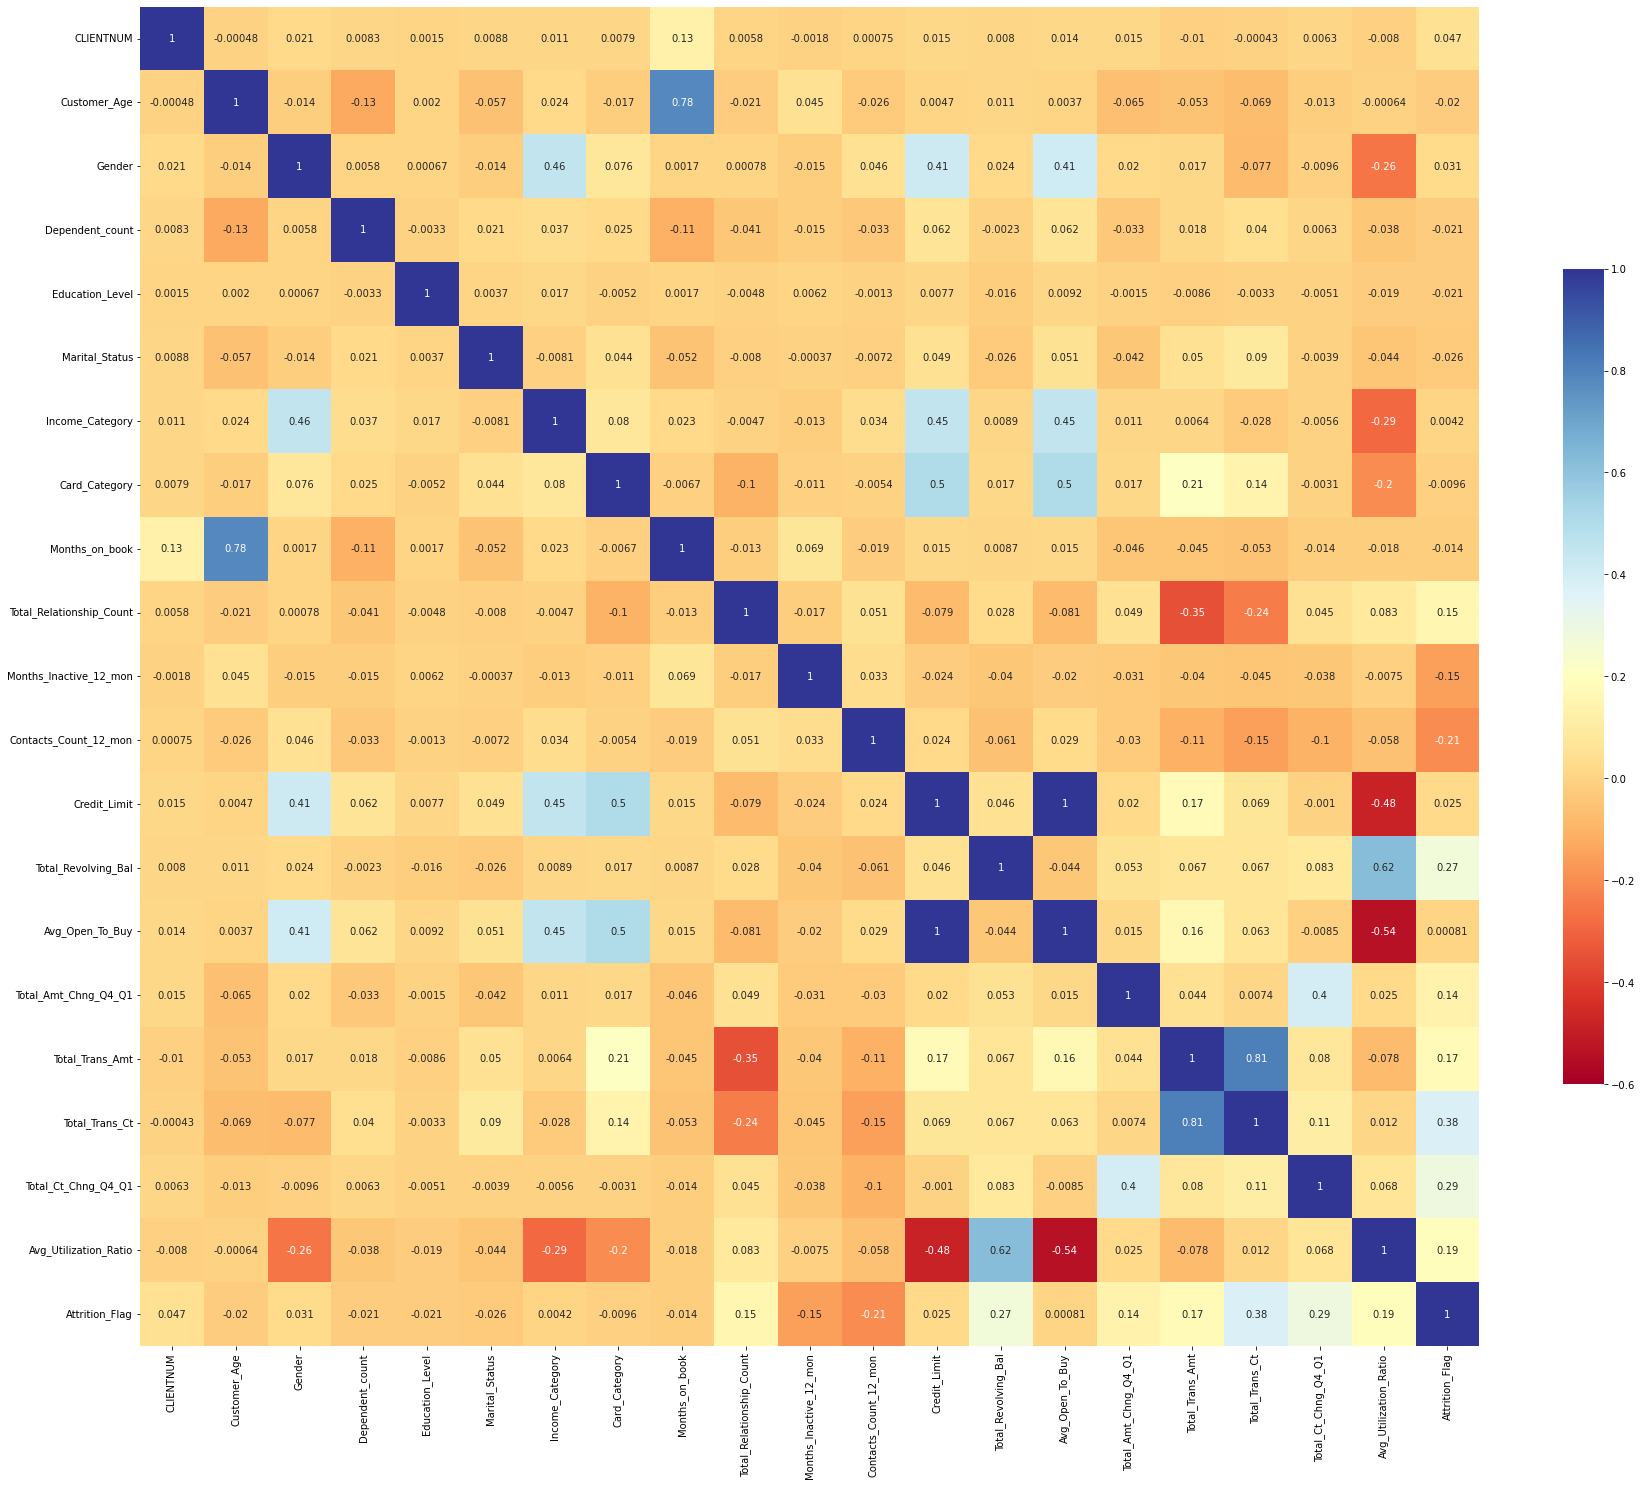

In [17]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(),cmap="RdYlBu", vmax=1, vmin=-0.6, center=0.2, square=True, linewidths=0, cbar_kws={"shrink": .5}, annot = True)

In [18]:
# Удалим признаки, которые не несут предсказательной силы и друг с другом слшком коррелируют

df.drop(['CLIENTNUM','Avg_Open_To_Buy', 'Total_Trans_Amt'], axis=1, inplace=True)

## Обучение данных

In [19]:
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [20]:
#decision_tree = DecisionTreeClassifier(max_depth = 6)
#decision_tree.fit(X_train, y_train)
#y_pred = decision_tree.predict(X_test)
#print([accuracy_score(y_test, y_pred),f1_score(y_test, y_pred)])

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [22]:
clf = RandomForestClassifier()

In [23]:
parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }
grid = GridSearchCV(clf, parametrs, cv=5)
grid.fit(X_train, y_train)
# Получаем наилучшие параметры для нашей модели
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}
0.9303986094115816
RandomForestClassifier(max_depth=11, n_estimators=30)


In [28]:
decision_tree = DecisionTreeClassifier(max_depth = 6)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
print([accuracy_score(y_test, y_pred),f1_score(y_test, y_pred)])

[0.9183852566915314, 0.9523321373654536]


In [29]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

Accuracy: 0.9183852566915314
Precision: 0.9336683417085427
Recall: 0.9717573221757322
F1 score: 0.9523321373654536
